In [ ]:
import pandas as pd
import os
from pathlib import Path
from tqdm import tqdm

# ==================== FILTER DATASET ====================
def filter_dataset_by_landmarks(csv_path, landmarks_dir, output_csv_path):
    """
    Filter the CSV to only include rows where landmark files exist.

    Args:
        csv_path: Path to original CSV file
        landmarks_dir: Directory containing .npy landmark files
        output_csv_path: Path to save filtered CSV
    """
    print("Loading original CSV...")
    df = pd.read_csv(csv_path)
    print(f"Original dataset size: {len(df)} samples")

    landmarks_path = Path(landmarks_dir)

    # Get list of available landmark files
    print("\nScanning for available landmark files...")
    available_files = set()
    for file in tqdm(landmarks_path.glob("*.npy")):
        # Extract uid from filename (remove .npy extension)
        uid = file.stem
        available_files.add(uid)

    print(f"Found {len(available_files)} landmark files")

    # Filter dataframe
    print("\nFiltering dataset...")
    filtered_df = df[df['uid'].isin(available_files)]

    print(f"Filtered dataset size: {len(filtered_df)} samples")
    print(f"Removed: {len(df) - len(filtered_df)} samples")

    # Save filtered dataset
    filtered_df.to_csv(output_csv_path, index=False)
    print(f"\n✓ Filtered dataset saved to: {output_csv_path}")

    # Show sample
    print("\nSample of filtered data:")
    print(filtered_df.head(10))

    return filtered_df


# ==================== CHECK DATASET INTEGRITY ====================
def check_dataset_integrity(csv_path, landmarks_dir):
    """
    Verify that all UIDs in CSV have corresponding landmark files.
    """
    df = pd.read_csv(csv_path)
    landmarks_path = Path(landmarks_dir)

    print(f"Checking {len(df)} samples...")
    missing_files = []

    for idx, row in tqdm(df.iterrows(), total=len(df)):
        uid = row['uid']
        landmark_file = landmarks_path / f"{uid}.npy"

        if not landmark_file.exists():
            missing_files.append(uid)

    if missing_files:
        print(f"\n⚠️  Warning: {len(missing_files)} landmark files are missing!")
        print("First 10 missing UIDs:")
        for uid in missing_files[:10]:
            print(f"  - {uid}")
    else:
        print("\n✓ All landmark files exist! Dataset is ready for training.")

    return len(missing_files) == 0


# ==================== GET DATASET STATISTICS ====================
def get_dataset_stats(csv_path, landmarks_dir):
    """
    Get statistics about the dataset and landmark files.
    """
    df = pd.read_csv(csv_path)
    landmarks_path = Path(landmarks_dir)

    print("=" * 60)
    print("DATASET STATISTICS")
    print("=" * 60)

    print(f"\nCSV Statistics:")
    print(f"  Total samples: {len(df)}")
    print(f"  Unique texts: {df['text'].nunique()}")
    print(f"  Average text length: {df['text'].str.len().mean():.1f} characters")

    print(f"\nLandmark Files:")
    landmark_files = list(landmarks_path.glob("*.npy"))
    print(f"  Total files: {len(landmark_files)}")

    if landmark_files:
        # Sample a few files to get statistics
        import numpy as np
        sample_files = landmark_files[:min(10, len(landmark_files))]

        shapes = []
        for file in sample_files:
            data = np.load(file)
            shapes.append(data.shape)

        print(f"\n  Sample file shapes (first 10):")
        for i, shape in enumerate(shapes):
            print(f"    {sample_files[i].name}: {shape}")

        # Calculate average frames
        avg_frames = sum(s[0] for s in shapes) / len(shapes)
        print(f"\n  Average frames: {avg_frames:.1f}")
        print(f"  Landmark dimensions: {shapes[0][1:]} (num_landmarks, coords)")

    print("=" * 60)





# ==================== MAIN FUNCTION ====================
def main():
    """
    Main function to run all preprocessing steps.
    Update these paths for your setup!
    """

    # UPDATE THESE PATHS
    original_csv = '/content/iSign_v1.1.csv'
    landmarks_directory = '/content/landmarks'
    filtered_csv = '/content/filtered_data.csv'

    print("=" * 60)
    print("SIGN LANGUAGE DATASET PREPROCESSING")
    print("=" * 60)

    # Step 1: Filter dataset
    print("\n[STEP 1] Filtering dataset by available landmarks...")
    filtered_df = filter_dataset_by_landmarks(
        original_csv,
        landmarks_directory,
        filtered_csv
    )

    # Step 2: Verify integrity
    print("\n[STEP 2] Verifying dataset integrity...")
    is_valid = check_dataset_integrity(filtered_csv, landmarks_directory)

    # Step 3: Show statistics
    print("\n[STEP 3] Dataset statistics...")
    get_dataset_stats(filtered_csv, landmarks_directory)

    if is_valid:
        print("\n" + "=" * 60)
        print("✓ PREPROCESSING COMPLETE!")
        print(f"✓ Use this CSV for training: {filtered_csv}")
        print(f"✓ Dataset size: {len(filtered_df)} samples")
        print("=" * 60)
    else:
        print("\n⚠️  Some landmark files are missing. Please check!")


if __name__ == "__main__":
    main()


# ==================== QUICK COLAB COMMANDS ====================
"""
# In Google Colab, run:

# 1. Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Run the preprocessing
main()

# 3. Update the training script to use the filtered CSV:
config = {
    'csv_path': '/content/drive/MyDrive/sign_language/train_filtered.csv',  # <-- Use filtered CSV
    'landmarks_dir': '/content/drive/MyDrive/sign_language/landmarks/',
    # ... rest of config
}
"""

SIGN LANGUAGE DATASET PREPROCESSING

[STEP 1] Filtering dataset by available landmarks...
Loading original CSV...
Original dataset size: 31222 samples

Scanning for available landmark files...


2599it [00:00, 123296.30it/s]


Found 2599 landmark files

Filtering dataset...
Filtered dataset size: 996 samples
Removed: 30226 samples

✓ Filtered dataset saved to: /content/filtered_data.csv

Sample of filtered data:
                uid                                               text
304  006faf1f7c93-0                                            Page 53
305  006faf1f7c93-1                                             Unit 5
306  006faf1f7c93-2                                    Merry go round.
307  006faf1f7c93-3                            Listen, sing and dance.
308  006faf1f7c93-4                  I climb up on the merry-go-round.
309  006faf1f7c93-5                       And it went round and round.
310  006faf1f7c93-6  I climb up on a big brown horse and it went up...
311  006faf1f7c93-7  around and round and up and down,  around and ...
312  006faf1f7c93-8                I set high up on a big brown horse.
313  006faf1f7c93-9                                   and rode around.

[STEP 2] Verifying dataset in

100%|██████████| 996/996 [00:00<00:00, 12033.02it/s]


✓ All landmark files exist! Dataset is ready for training.

[STEP 3] Dataset statistics...
DATASET STATISTICS

CSV Statistics:
  Total samples: 996
  Unique texts: 954
  Average text length: 27.0 characters

Landmark Files:
  Total files: 2599

  Sample file shapes (first 10):
    027ae060c5e0-67.npy: (43, 138)
    -PhrTpyInGs--0.npy: (42, 138)
    027ae060c5e0-22.npy: (36, 138)
    -L5jtbg3TNk--29.npy: (40, 138)
    08hcowRA5Cg--13.npy: (102, 138)
    0-l-i-sK9mc--30.npy: (39, 138)
    0G6BgHvWDlM--21.npy: (29, 138)
    -QwS14OhYVM--20.npy: (80, 138)
    07285daf5fd0-107.npy: (33, 138)
    -hpbvSjpEiY--115.npy: (13, 138)

  Average frames: 45.7
  Landmark dimensions: (138,) (num_landmarks, coords)

✓ PREPROCESSING COMPLETE!
✓ Use this CSV for training: /content/filtered_data.csv
✓ Dataset size: 996 samples


"\n# In Google Colab, run:\n\n# 1. Mount Drive\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# 2. Run the preprocessing\nmain()\n\n# 3. Update the training script to use the filtered CSV:\nconfig = {\n    'csv_path': '/content/drive/MyDrive/sign_language/train_filtered.csv',  # <-- Use filtered CSV\n    'landmarks_dir': '/content/drive/MyDrive/sign_language/landmarks/',\n    # ... rest of config\n}\n"

In [ ]:
# ======================================================
# SIGN LANGUAGE TO TEXT TRAINING (SINGLE CELL VERSION)
# Encoder: Bi-GRU + Attention + CTC
# Decoder: T5-small + LoRA
# ======================================================

# -------------------- SETUP --------------------
!pip install transformers peft accelerate -q

import os, time, json
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration
from peft import LoraConfig, get_peft_model, TaskType
from google.colab import drive

print("=" * 60)
print(f"GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("⚠️ No GPU detected!")
print("=" * 60)

drive.mount('/content/drive')

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# -------------------- DATASET FILTERING --------------------
def filter_dataset_by_landmarks(csv_path, landmarks_dir, output_csv_path):
    df = pd.read_csv(csv_path)
    available = {f.stem for f in Path(landmarks_dir).glob("*.npy")}
    df = df[df["uid"].isin(available)]
    df.to_csv(output_csv_path, index=False)
    print(f"Filtered dataset saved: {output_csv_path} | Samples: {len(df)}")
    return df

filter_dataset_by_landmarks(
    csv_path="/content/filtered_data.csv",
    landmarks_dir="/content/landmarks",
    output_csv_path="/content/filtered_training_data.csv"
)

# -------------------- DATASET --------------------
class SignLanguageDataset(Dataset):
    def __init__(self, csv_path, landmarks_dir, max_frames=150):
        self.df = pd.read_csv(csv_path)
        self.landmarks_dir = Path(landmarks_dir)
        self.max_frames = max_frames

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        uid, text = row["uid"], row["text"]
        landmarks = np.load(self.landmarks_dir / f"{uid}.npy")

        frames = landmarks.shape[0]
        if frames < self.max_frames:
            landmarks = np.pad(landmarks, ((0, self.max_frames - frames), (0, 0)))
        else:
            landmarks = landmarks[:self.max_frames]
            frames = self.max_frames

        return {
            "landmarks": torch.FloatTensor(landmarks),
            "text": text,
            "length": frames
        }

def collate_fn(batch):
    return (
        torch.stack([b["landmarks"] for b in batch]),
        [b["text"] for b in batch],
        torch.LongTensor([b["length"] for b in batch])
    )

# -------------------- Bi-GRU ENCODER --------------------
class SignLanguageEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, num_layers=2,
                 num_heads=4, num_glosses=5000):
        super().__init__()

        self.proj = nn.Linear(input_dim, hidden_dim)

        self.bigru = nn.GRU(
            hidden_dim,
            hidden_dim // 2,
            num_layers=num_layers,
            bidirectional=True,
            batch_first=True,
            dropout=0.3 if num_layers > 1 else 0
        )

        self.attn = nn.MultiheadAttention(
            hidden_dim, num_heads, batch_first=True, dropout=0.1
        )

        self.ff = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim * 2, hidden_dim)
        )

        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.ctc = nn.Linear(hidden_dim, num_glosses + 1)

    def forward(self, x, lengths):
        x = self.proj(x)

        packed = nn.utils.rnn.pack_padded_sequence(
            x, lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        out, _ = self.bigru(packed)
        out, _ = nn.utils.rnn.pad_packed_sequence(out, batch_first=True)

        attn_out, _ = self.attn(out, out, out)
        x = self.norm1(out + attn_out)

        ff_out = self.ff(x)
        x = self.norm2(x + ff_out)

        return torch.log_softmax(self.ctc(x), dim=-1)

# -------------------- GLOSS VOCAB --------------------
class GlossVocabulary:
    def __init__(self):
        self.gloss2idx = {"<blank>": 0, "<pad>": 1}
        self.idx2gloss = {0: "<blank>", 1: "<pad>"}
        self.next = 2

    def add(self, g):
        if g not in self.gloss2idx:
            self.gloss2idx[g] = self.next
            self.idx2gloss[self.next] = g
            self.next += 1

# -------------------- TRAIN FUNCTIONS --------------------
def train_encoder(model, loader, opt, crit, vocab):
    model.train()
    loss_sum = 0

    for lm, texts, lengths in tqdm(loader):
        lm, lengths = lm.to(DEVICE), lengths.to(DEVICE)

        targets, tgt_len = [], []
        for t in texts:
            words = t.lower().split()[:20]
            for w in words:
                vocab.add(w)
            ids = [vocab.gloss2idx[w] for w in words]
            targets.extend(ids)
            tgt_len.append(len(ids))

        targets = torch.LongTensor(targets).to(DEVICE)
        tgt_len = torch.LongTensor(tgt_len).to(DEVICE)

        logp = model(lm, lengths)
        loss = crit(logp.permute(1, 0, 2), targets, lengths, tgt_len)

        opt.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        opt.step()

        loss_sum += loss.item()

    return loss_sum / len(loader)

def train_decoder(encoder, decoder, loader, opt, tokenizer):
    encoder.eval()
    decoder.train()
    loss_sum = 0

    for lm, texts, lengths in tqdm(loader):
        lm, lengths = lm.to(DEVICE), lengths.to(DEVICE)

        with torch.no_grad():
            preds = torch.argmax(encoder(lm, lengths), dim=-1)

        gloss_texts = [
            " ".join([f"G{i}" for i in p[:l].cpu().numpy()])
            for p, l in zip(preds, lengths)
        ]

        inputs = tokenizer(gloss_texts, padding=True, return_tensors="pt").to(DEVICE)
        labels = tokenizer(texts, padding=True, return_tensors="pt").input_ids.to(DEVICE)
        labels[labels == tokenizer.pad_token_id] = -100

        loss = decoder(**inputs, labels=labels).loss

        opt.zero_grad()
        loss.backward()
        opt.step()

        loss_sum += loss.item()

    return loss_sum / len(loader)

# -------------------- MAIN --------------------
dataset = SignLanguageDataset(
    "/content/filtered_training_data.csv",
    "/content/landmarks"
)
loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

input_dim = dataset[0]["landmarks"].shape[1]
encoder = SignLanguageEncoder(input_dim).to(DEVICE)
vocab = GlossVocabulary()

tokenizer = T5Tokenizer.from_pretrained("t5-small")
decoder = T5ForConditionalGeneration.from_pretrained("t5-small")

decoder = get_peft_model(
    decoder,
    LoraConfig(
        task_type=TaskType.SEQ_2_SEQ_LM,
        r=8,
        lora_alpha=32,
        lora_dropout=0.1,
        target_modules=["q", "v"]
    )
).to(DEVICE)

enc_opt = optim.AdamW(encoder.parameters(), lr=1e-4)
dec_opt = optim.AdamW(decoder.parameters(), lr=1e-4)
ctc_loss = nn.CTCLoss(blank=0, zero_infinity=True)

training_history = {
    "encoder_loss": [],
    "decoder_loss": [],
    "average_loss": []
}


num_epochs = 60

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    enc_loss = train_encoder(encoder, loader, enc_opt, ctc_loss, vocab)
    dec_loss = train_decoder(encoder, decoder, loader, dec_opt, tokenizer)

    avg_loss = (enc_loss + dec_loss) / 2

    # 🔹 Save losses
    training_history["encoder_loss"].append(enc_loss)
    training_history["decoder_loss"].append(dec_loss)
    training_history["average_loss"].append(avg_loss)

    print(f"Encoder Loss : {enc_loss:.4f}")
    print(f"Decoder Loss : {dec_loss:.4f}")
    print(f"Average Loss : {avg_loss:.4f}")

print("✅ Training Completed")

history_path = "/content/training_history.json"

with open(history_path, "w") as f:
    json.dump(training_history, f, indent=4)

print(f"✅ Training history saved to {history_path}")


GPU Available: True
GPU: Tesla T4
Memory: 15.83 GB
Mounted at /content/drive
Filtered dataset saved: /content/filtered_training_data.csv | Samples: 996


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]


Epoch 1/60


100%|██████████| 125/125 [00:12<00:00, 10.35it/s]


Encoder Loss : 15.2562
Decoder Loss : 6.3852
Average Loss : 10.8207

Epoch 2/60


100%|██████████| 125/125 [00:11<00:00, 10.56it/s]


Encoder Loss : 7.5062
Decoder Loss : 4.8609
Average Loss : 6.1836

Epoch 3/60


100%|██████████| 125/125 [00:11<00:00, 10.61it/s]


Encoder Loss : 7.3061
Decoder Loss : 4.5887
Average Loss : 5.9474

Epoch 4/60


100%|██████████| 125/125 [00:11<00:00, 10.60it/s]


Encoder Loss : 7.2212
Decoder Loss : 4.4699
Average Loss : 5.8456

Epoch 5/60


100%|██████████| 125/125 [00:12<00:00, 10.32it/s]


Encoder Loss : 7.1790
Decoder Loss : 4.3949
Average Loss : 5.7870

Epoch 6/60


100%|██████████| 125/125 [00:12<00:00, 10.16it/s]


Encoder Loss : 7.1374
Decoder Loss : 4.3486
Average Loss : 5.7430

Epoch 7/60


100%|██████████| 125/125 [00:12<00:00, 10.22it/s]


Encoder Loss : 7.0954
Decoder Loss : 4.3082
Average Loss : 5.7018

Epoch 8/60


100%|██████████| 125/125 [00:12<00:00, 10.14it/s]


Encoder Loss : 7.0428
Decoder Loss : 4.2617
Average Loss : 5.6522

Epoch 9/60


100%|██████████| 125/125 [00:12<00:00, 10.15it/s]


Encoder Loss : 6.9903
Decoder Loss : 4.2261
Average Loss : 5.6082

Epoch 10/60


100%|██████████| 125/125 [00:12<00:00, 10.03it/s]


Encoder Loss : 6.9155
Decoder Loss : 4.2193
Average Loss : 5.5674

Epoch 11/60


100%|██████████| 125/125 [00:12<00:00, 10.00it/s]


Encoder Loss : 6.8349
Decoder Loss : 4.1733
Average Loss : 5.5041

Epoch 12/60


100%|██████████| 125/125 [00:12<00:00, 10.02it/s]


Encoder Loss : 6.7565
Decoder Loss : 4.1397
Average Loss : 5.4481

Epoch 13/60


100%|██████████| 125/125 [00:12<00:00, 10.10it/s]


Encoder Loss : 6.6583
Decoder Loss : 4.1189
Average Loss : 5.3886

Epoch 14/60


100%|██████████| 125/125 [00:12<00:00, 10.17it/s]


Encoder Loss : 6.5572
Decoder Loss : 4.1033
Average Loss : 5.3302

Epoch 15/60


100%|██████████| 125/125 [00:12<00:00, 10.26it/s]


Encoder Loss : 6.4443
Decoder Loss : 4.0911
Average Loss : 5.2677

Epoch 16/60


100%|██████████| 125/125 [00:12<00:00, 10.11it/s]


Encoder Loss : 6.3586
Decoder Loss : 4.0717
Average Loss : 5.2151

Epoch 17/60


100%|██████████| 125/125 [00:12<00:00, 10.18it/s]


Encoder Loss : 6.2824
Decoder Loss : 4.0332
Average Loss : 5.1578

Epoch 18/60


100%|██████████| 125/125 [00:12<00:00, 10.12it/s]


Encoder Loss : 6.1912
Decoder Loss : 4.0085
Average Loss : 5.0999

Epoch 19/60


100%|██████████| 125/125 [00:12<00:00, 10.13it/s]


Encoder Loss : 6.1273
Decoder Loss : 4.0159
Average Loss : 5.0716

Epoch 20/60


100%|██████████| 125/125 [00:12<00:00, 10.17it/s]


Encoder Loss : 6.0575
Decoder Loss : 3.9965
Average Loss : 5.0270

Epoch 21/60


100%|██████████| 125/125 [00:12<00:00, 10.29it/s]


Encoder Loss : 5.9824
Decoder Loss : 3.9713
Average Loss : 4.9768

Epoch 22/60


100%|██████████| 125/125 [00:12<00:00,  9.95it/s]


Encoder Loss : 5.8889
Decoder Loss : 3.9463
Average Loss : 4.9176

Epoch 23/60


100%|██████████| 125/125 [00:12<00:00,  9.94it/s]


Encoder Loss : 5.8196
Decoder Loss : 3.9487
Average Loss : 4.8841

Epoch 24/60


100%|██████████| 125/125 [00:12<00:00, 10.11it/s]


Encoder Loss : 5.7453
Decoder Loss : 3.9490
Average Loss : 4.8472

Epoch 25/60


100%|██████████| 125/125 [00:12<00:00, 10.07it/s]


Encoder Loss : 5.6928
Decoder Loss : 3.9130
Average Loss : 4.8029

Epoch 26/60


100%|██████████| 125/125 [00:12<00:00, 10.29it/s]


Encoder Loss : 5.5969
Decoder Loss : 3.9031
Average Loss : 4.7500

Epoch 27/60


100%|██████████| 125/125 [00:12<00:00, 10.29it/s]


Encoder Loss : 5.5303
Decoder Loss : 3.8760
Average Loss : 4.7032

Epoch 28/60


100%|██████████| 125/125 [00:12<00:00, 10.27it/s]


Encoder Loss : 5.4495
Decoder Loss : 3.8835
Average Loss : 4.6665

Epoch 29/60


100%|██████████| 125/125 [00:12<00:00, 10.23it/s]


Encoder Loss : 5.3631
Decoder Loss : 3.8487
Average Loss : 4.6059

Epoch 30/60


100%|██████████| 125/125 [00:12<00:00, 10.18it/s]


Encoder Loss : 5.2867
Decoder Loss : 3.8357
Average Loss : 4.5612

Epoch 31/60


100%|██████████| 125/125 [00:12<00:00, 10.05it/s]


Encoder Loss : 5.1892
Decoder Loss : 3.8380
Average Loss : 4.5136

Epoch 32/60


100%|██████████| 125/125 [00:12<00:00, 10.28it/s]


Encoder Loss : 5.1094
Decoder Loss : 3.8498
Average Loss : 4.4796

Epoch 33/60


100%|██████████| 125/125 [00:12<00:00,  9.63it/s]


Encoder Loss : 5.0463
Decoder Loss : 3.8227
Average Loss : 4.4345

Epoch 34/60


100%|██████████| 125/125 [00:12<00:00,  9.81it/s]


Encoder Loss : 4.9605
Decoder Loss : 3.8148
Average Loss : 4.3877

Epoch 35/60


100%|██████████| 125/125 [00:12<00:00,  9.73it/s]


Encoder Loss : 4.8567
Decoder Loss : 3.8005
Average Loss : 4.3286

Epoch 36/60


100%|██████████| 125/125 [00:12<00:00, 10.02it/s]


Encoder Loss : 4.7777
Decoder Loss : 3.7709
Average Loss : 4.2743

Epoch 37/60


100%|██████████| 125/125 [00:12<00:00, 10.10it/s]


Encoder Loss : 4.6870
Decoder Loss : 3.7660
Average Loss : 4.2265

Epoch 38/60


100%|██████████| 125/125 [00:12<00:00, 10.13it/s]


Encoder Loss : 4.6003
Decoder Loss : 3.7716
Average Loss : 4.1860

Epoch 39/60


100%|██████████| 125/125 [00:12<00:00,  9.80it/s]


Encoder Loss : 4.5253
Decoder Loss : 3.7486
Average Loss : 4.1370

Epoch 40/60


100%|██████████| 125/125 [00:12<00:00,  9.76it/s]


Encoder Loss : 4.4269
Decoder Loss : 3.7385
Average Loss : 4.0827

Epoch 41/60


100%|██████████| 125/125 [00:12<00:00, 10.04it/s]


Encoder Loss : 4.3373
Decoder Loss : 3.7357
Average Loss : 4.0365

Epoch 42/60


100%|██████████| 125/125 [00:12<00:00, 10.06it/s]


Encoder Loss : 4.2553
Decoder Loss : 3.7216
Average Loss : 3.9884

Epoch 43/60


100%|██████████| 125/125 [00:12<00:00, 10.12it/s]


Encoder Loss : 4.1804
Decoder Loss : 3.7181
Average Loss : 3.9492

Epoch 44/60


100%|██████████| 125/125 [00:12<00:00, 10.12it/s]


Encoder Loss : 4.0922
Decoder Loss : 3.7039
Average Loss : 3.8980

Epoch 45/60


100%|██████████| 125/125 [00:12<00:00, 10.01it/s]


Encoder Loss : 4.0184
Decoder Loss : 3.6767
Average Loss : 3.8476

Epoch 46/60


100%|██████████| 125/125 [00:12<00:00, 10.13it/s]


Encoder Loss : 3.9278
Decoder Loss : 3.6546
Average Loss : 3.7912

Epoch 47/60


100%|██████████| 125/125 [00:12<00:00,  9.92it/s]


Encoder Loss : 3.8343
Decoder Loss : 3.7012
Average Loss : 3.7678

Epoch 48/60


100%|██████████| 125/125 [00:12<00:00,  9.95it/s]


Encoder Loss : 3.7607
Decoder Loss : 3.6594
Average Loss : 3.7100

Epoch 49/60


100%|██████████| 125/125 [00:12<00:00,  9.91it/s]


Encoder Loss : 3.6817
Decoder Loss : 3.6736
Average Loss : 3.6777

Epoch 50/60


100%|██████████| 125/125 [00:12<00:00,  9.91it/s]


Encoder Loss : 3.5800
Decoder Loss : 3.6330
Average Loss : 3.6065

Epoch 51/60


100%|██████████| 125/125 [00:12<00:00,  9.84it/s]


Encoder Loss : 3.4975
Decoder Loss : 3.6357
Average Loss : 3.5666

Epoch 52/60


100%|██████████| 125/125 [00:12<00:00,  9.92it/s]


Encoder Loss : 3.4130
Decoder Loss : 3.5994
Average Loss : 3.5062

Epoch 53/60


100%|██████████| 125/125 [00:12<00:00, 10.12it/s]


Encoder Loss : 3.3371
Decoder Loss : 3.6125
Average Loss : 3.4748

Epoch 54/60


100%|██████████| 125/125 [00:12<00:00,  9.97it/s]


Encoder Loss : 3.2714
Decoder Loss : 3.6017
Average Loss : 3.4366

Epoch 55/60


100%|██████████| 125/125 [00:12<00:00, 10.02it/s]


Encoder Loss : 3.1733
Decoder Loss : 3.6320
Average Loss : 3.4027

Epoch 56/60


100%|██████████| 125/125 [00:12<00:00,  9.99it/s]


Encoder Loss : 3.1202
Decoder Loss : 3.6179
Average Loss : 3.3691

Epoch 57/60


100%|██████████| 125/125 [00:12<00:00,  9.84it/s]


Encoder Loss : 3.0338
Decoder Loss : 3.6085
Average Loss : 3.3211

Epoch 58/60


100%|██████████| 125/125 [00:12<00:00,  9.95it/s]


Encoder Loss : 2.9532
Decoder Loss : 3.5679
Average Loss : 3.2605

Epoch 59/60


100%|██████████| 125/125 [00:12<00:00,  9.65it/s]


Encoder Loss : 2.8913
Decoder Loss : 3.5746
Average Loss : 3.2329

Epoch 60/60


100%|██████████| 125/125 [00:12<00:00,  9.67it/s]

Encoder Loss : 2.8051
Decoder Loss : 3.5537
Average Loss : 3.1794
✅ Training Completed
✅ Training history saved to /content/training_history.json


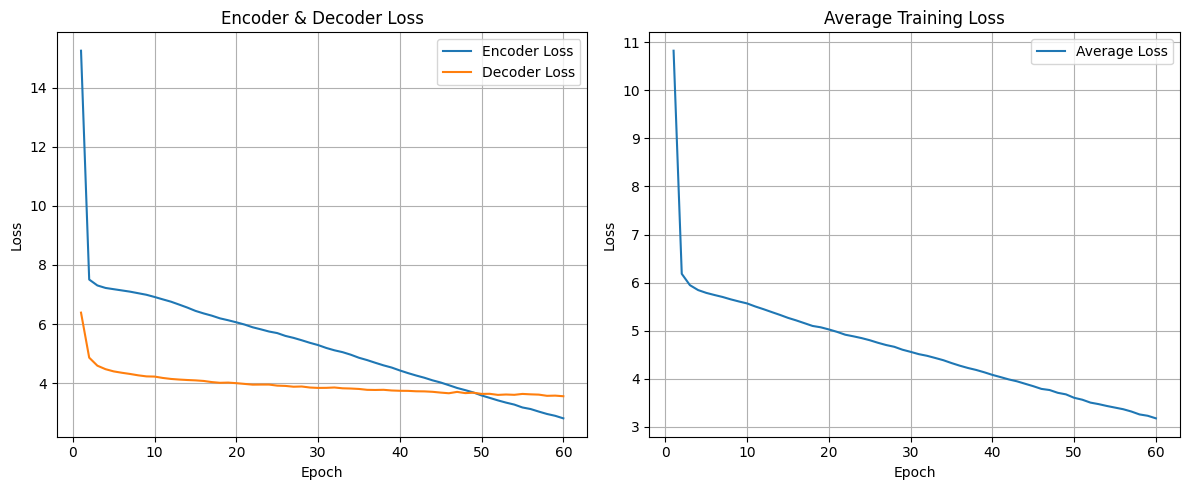

In [ ]:
import matplotlib.pyplot as plt
import json

# Load history
with open("/content/training_history.json", "r") as f:
    history = json.load(f)

epochs = range(1, len(history["encoder_loss"]) + 1)

plt.figure(figsize=(12, 5))

# Encoder & Decoder loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history["encoder_loss"], label="Encoder Loss")
plt.plot(epochs, history["decoder_loss"], label="Decoder Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Encoder & Decoder Loss")
plt.legend()
plt.grid(True)

# Average loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history["average_loss"], label="Average Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Average Training Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
